## <center>**🚀 Exploratory Data Analysis (EDA) for Stock Market Data**

#### **📌 Purpose of EDA**:
- Before building an AI-powered financial agent, we need to deeply analyze stock data using statistical insights, visualizations, and patterns.

#### **📌 Industry-Standard EDA Workflow**
- 📊 What will we analyze?
- ✅ Basic Statistics & Data Quality Checks
- ✅ Time-Series Analysis (Stock Trends, Seasonality, Cyclic Patterns)
- ✅ Volatility Analysis & Market Risk Assessment
- ✅ Correlation & Relationship Analysis
- ✅ Technical Indicator Analysis
- ✅ Anomaly & Outlier Detection
- ✅ Market Sentiment & External Factors Analysis

## 🔹 **Step 1: Load Data & Initial Inspection**

**📌 Tasks:**

- Check dataset structure, missing values, duplicates
- Identify the data type of each column
- Check date range & time granularity

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Define the stock symbol (e.g., Apple - AAPL)
stock_symbol = "AAPL"

# Fetch historical stock data (last 1 year)
stock_data = yf.download(stock_symbol, period="5y", interval="1d")

# Display the first few rows
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-04-03,58.585144,59.626235,57.993007,58.922468,129880000
2020-04-06,63.695965,63.851276,60.519297,60.888167,201820400
2020-04-07,62.958202,65.935878,62.853852,65.717461,202887200
2020-04-08,64.569611,64.885090,63.395045,63.761485,168895200
2020-04-09,65.035561,65.540337,64.237152,65.207868,161834800


In [3]:
stock_data.columns = [col[0] for col in stock_data.columns]

In [15]:
# Save data to CSV
stock_data.to_csv(f"{os.path.join("../data/")}{stock_symbol}_stock_data.csv")

In [20]:
stock_data = pd.read_csv("./AAPL_stock_data.csv", index_col="Date", parse_dates=True)

In [21]:
# Basic info
print("Dataset Info:")
stock_data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-04-03 to 2025-04-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Open    1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [22]:
print("\nMissing Values:")
stock_data.isnull().sum()


Missing Values:


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [26]:
# Check duplicates
print(f"Duplicate rows: {stock_data.duplicated().sum()}")

Duplicate rows: 0


In [27]:
print(f"Data from {stock_data.index.min()} to {stock_data.index.max()}")

Data from 2020-04-03 00:00:00 to 2025-04-02 00:00:00


In [23]:
# Descriptive statistics
print("\nDescriptive Statistics:")
stock_data.describe()


Descriptive Statistics:


,Close,High,Low,Open,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,160.223691,161.833738,158.431446,160.072273,8.329247e+07
std,41.028563,41.233859,40.739128,40.963773,4.335499e+07
min,58.585144,59.626235,57.993007,58.922468,2.323470e+07
25%,131.898651,133.409012,130.541223,132.342471,5.346818e+07
50%,157.413750,159.949013,155.337287,157.649025,7.239095e+07
75%,183.785709,185.394015,182.360118,183.929253,9.894958e+07
max,258.735504,259.814335,257.347047,257.906429,3.743368e+08


## 🔹 **Step 2: Stock Price Trend Analysis**

**📌 Tasks:**
- Visualize stock Closing Price trend
- Compare Open, High, Low, Close Prices
- Identify patterns (bullish/bearish trends)

**📌 What This Tells Us?**
- A stock with a rising trend may indicate bullish momentum (price increasing).
- A stock with a declining trend suggests bearish momentum (price falling).
- Large differences between High and Low suggest high volatility (risky investments).

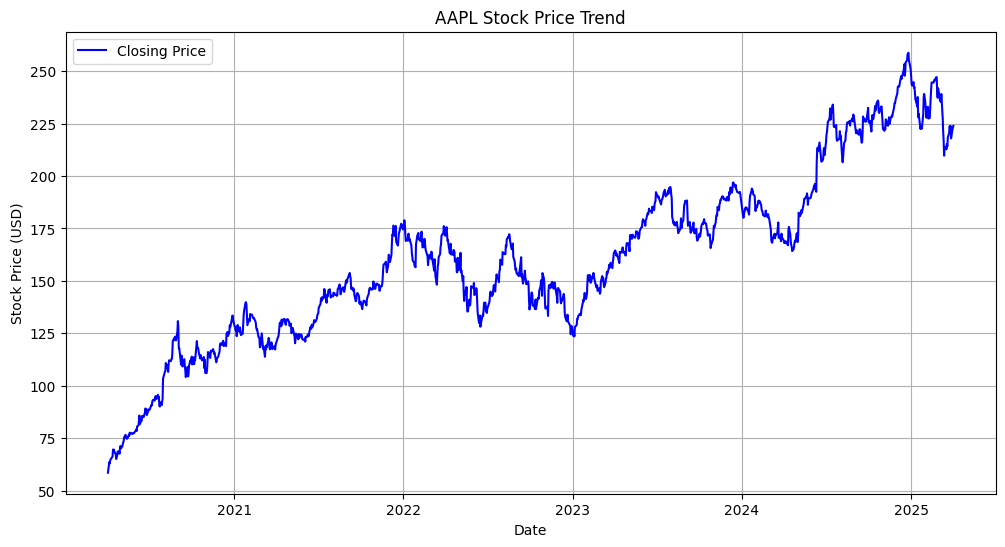

In [28]:
# Plot Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data["Close"], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Stock Price Trend")
plt.legend()
plt.grid()
plt.show()

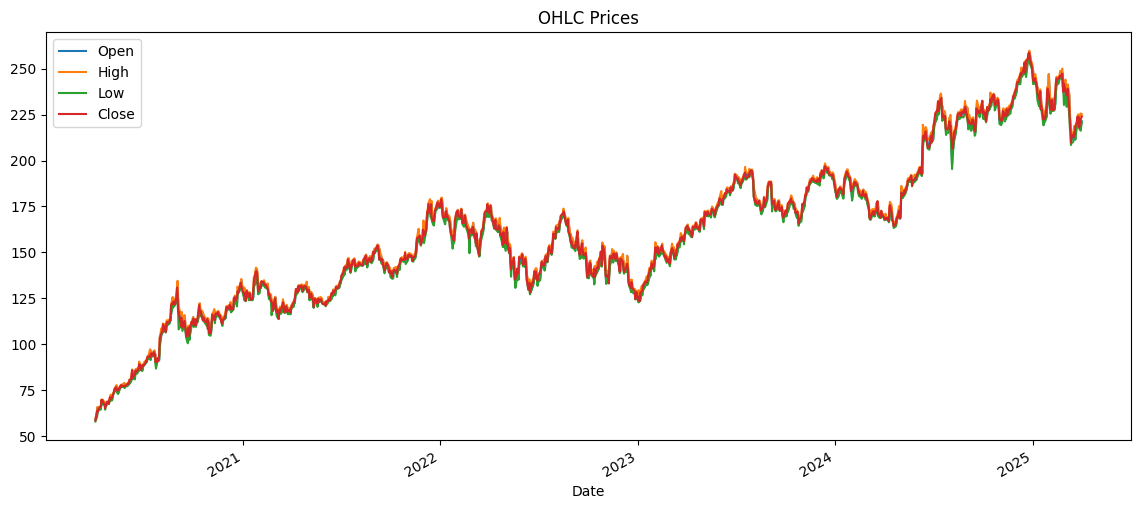

In [29]:
stock_data[["Open", "High", "Low", "Close"]].plot(figsize=(14, 6), title="OHLC Prices")
plt.show()

## **🔹 Step 3: Stock Returns & Volatility Analysis**

**📌 Tasks:**
- Compute Daily Returns (pct change)
- Plot Returns Distribution (Histogram & KDE)
- Identify Volatility Periods

**🎯 Goal:**
- Calculate how much the stock price changes daily.
- Understand how volatile (risky) the stock is.
- Find periods of high & low risk.

**📌 Concepts Explained:**

- Formula:
1. **Percentage Change (`pct_change()`)**
   - Measures how much a stock price changes **compared to the previous day**.
   - Formula:
     \text{Daily Return} = Current Close - Previous Close / Previous Close

2. Volatility (Risk Measurement)
- High Volatility = Large up and down movements (risky investment).
- Low Volatility = Small, steady movements (stable investment).
- We use the Rolling Standard Deviation to measure volatility over time.

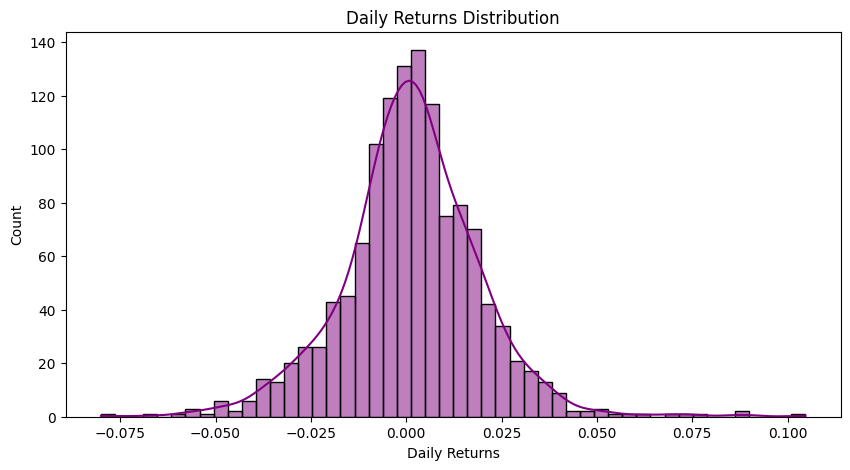

In [32]:
stock_data['Daily Returns'] = stock_data['Close'].pct_change()

# Plot Daily Returns Distribution
plt.figure(figsize=(10, 5))
sns.histplot(stock_data["Daily Returns"].dropna(), kde=True, bins=50, color="purple")
plt.title("Daily Returns Distribution")
plt.show()

**🎯 Goal:**
- Track how volatility changes over time.
- Find periods where the stock was risky vs. stable.

**📌 Concepts Explained:**
1.Rolling Volatility (rolling(window).std())
- Measures how volatile the stock was in the last "X" days.

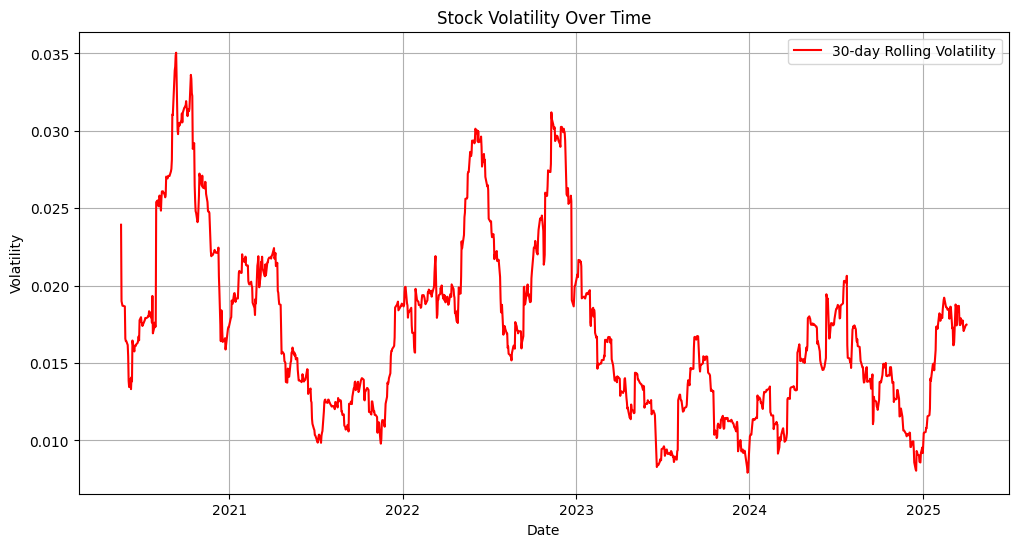

In [ ]:
# Compute Rolling Volatility (30-day standard deviation of returns)
stock_data['Rolling Volatility'] = stock_data['Daily Returns'].rolling(window=30).std()

# Plot Rolling Volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data["Rolling Volatility"], label="30-day Rolling Volatility", color="red")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Volatility Over Time")
plt.legend()
plt.grid()
plt.show()

## **🔹 Step 4: Technical Indicators Analysis**

**📌 Tasks:**
- Compute SMA, EMA, RSI, MACD, Bollinger Bands
- Visualize indicator-based patterns

In [40]:
# Simple Moving Averages (SMA)
stock_data["SMA_50"] = stock_data['Close'].rolling(window=50).mean()
stock_data["SMA_200"] = stock_data['Close'].rolling(window=200).mean()

# Exponential Moving Average (EMA)
stock_data["EMA_50"] = stock_data['Close'].ewm(span=50, adjust=False).mean()

In [43]:
# RSI Calculation
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (- delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

In [44]:
# MACD Calculation
stock_data["MACD"] = stock_data["EMA_50"] - stock_data["SMA_200"]

In [45]:
# Bollinger Bands
stock_data["Bollinger_Upper"] = stock_data["SMA_50"] + (stock_data["Close"].rolling(window=50).std() * 2)
stock_data["Bollinger_Lower"] = stock_data["SMA_50"] - (stock_data["Close"].rolling(window=50).std() * 2)

**🎯 Goal:**
- Use **technical indicators** to identify trends and potential trading signals.

**📌 Concepts Explained:**
1. **Moving Averages:**
   - **SMA (Simple Moving Average):**  
     - Average price over the last **N** days.  
     - Helps smoothen short-term fluctuations.  
   - **EMA (Exponential Moving Average):**  
     - Similar to SMA, but **gives more weight** to recent prices.  
     - Reacts **faster** to price changes.  

2. **Relative Strength Index (RSI):**
   - Measures **how fast a stock price is rising or falling**.
   - **Above 70** → Overbought (may fall soon).  
   - **Below 30** → Oversold (may rise soon).  

3. **MACD (Moving Average Convergence Divergence):**
   - Detects **trend changes**.
   - If **MACD > 0**, stock is in **uptrend**.  
   - If **MACD < 0**, stock is in **downtrend**.  


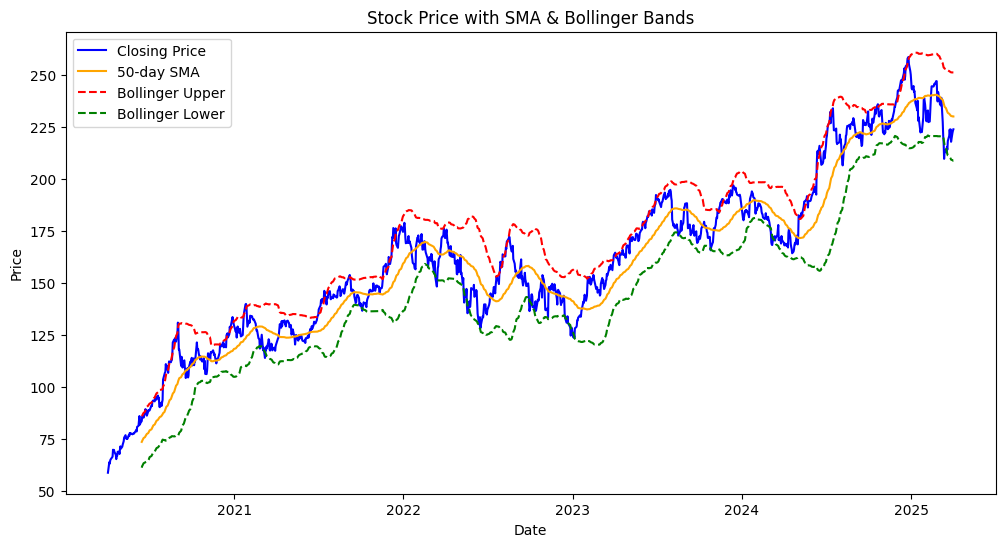

In [46]:
# Plot SMA & Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(stock_data["Close"], label="Closing Price", color='blue')
plt.plot(stock_data["SMA_50"], label="50-day SMA", color='orange')
plt.plot(stock_data["Bollinger_Upper"], label="Bollinger Upper", color='red', linestyle="dashed")
plt.plot(stock_data["Bollinger_Lower"], label="Bollinger Lower", color='green', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with SMA & Bollinger Bands")
plt.legend()
plt.show()

## **🔹 Step 6: Outlier & Anomaly Detection**

**📌 Tasks:**
- Detect unusual price fluctuations using Box Plot & Z-score
- Identify Price Spikes

In [48]:
# Compute Z-score
stock_data['Z-Score'] = (stock_data["Close"] - stock_data['Close'].mean()) / stock_data['Close'].std()

# Identify anomalies (Z-score > 3)
stock_data['Anomaly'] = np.where(stock_data['Z-Score'] > 3, 1, 0)

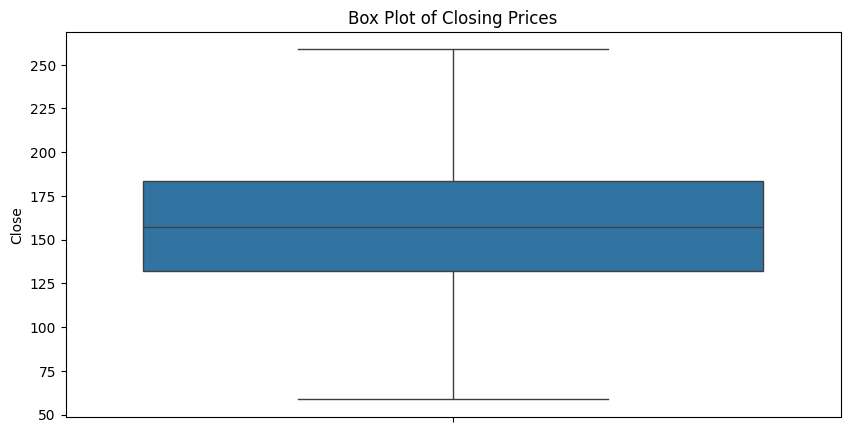

In [49]:
# Box Plot for Outlier Detection
plt.figure(figsize=(10, 5))
sns.boxplot(stock_data["Close"])
plt.title("Box Plot of Closing Prices")
plt.show()

## **🚀 Final Summary: What Have We Done?**
- ✅ Basic Data Inspection & Cleaning
- ✅ Stock Price Trend Analysis
- ✅ Returns & Volatility Analysis
- ✅ Correlation & Market Relationship Analysis
- ✅ Technical Indicators Computation
- ✅ Outlier & Anomaly Detection